# Kyphosis Disease Classification
Jaime Avendaño

This is an example of a Random Forest classifier.  
Kyphosis is an abnormally excessive convex curvature of the spine.

### Dataset:
* age - in months
* number - # of vertebrae involved
* start - # of first vertebra operated on

### Target:
* kyphosis - absent or present

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [66]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
data = pd.read_csv('Course_Data\Kyphosis.csv')
data = data.clean_names(case_type='snake')
data.head()

,kyphosis,age,number,start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.shape

(81, 4)

# EDA

In [8]:
data.describe()

,age,number,start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   kyphosis  81 non-null     object
 1   age       81 non-null     int64 
 2   number    81 non-null     int64 
 3   start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
data.kyphosis.value_counts()

absent     64
present    17
Name: kyphosis, dtype: int64

<AxesSubplot:>

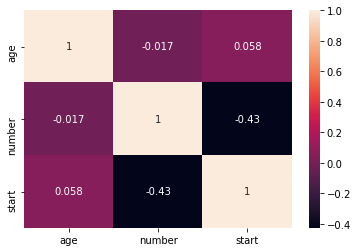

In [38]:
sns.heatmap(data.corr(), annot=True)

<Figure size 1080x1080 with 0 Axes>

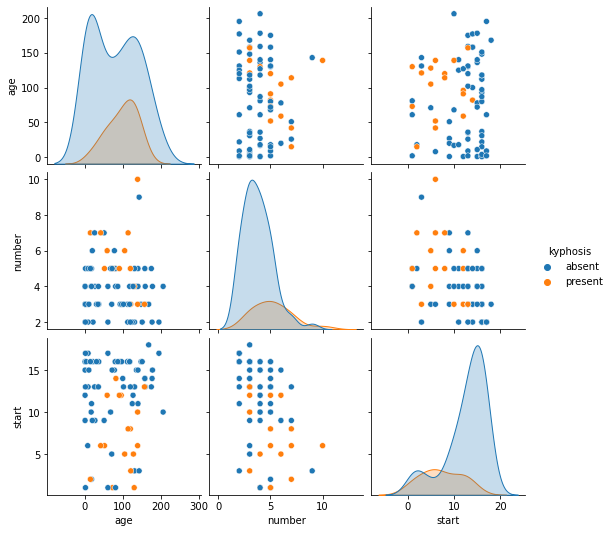

In [17]:
plt.figure(figsize=(15, 15))
sns.pairplot(data, hue='kyphosis', 
             vars=['age', 'number', 'start'])

# Data Cleaning
1. kyphosis - LabelEncoder
2. MinMaxScaler on all features

In [19]:
train = data.drop(columns=['kyphosis'])

In [24]:
label_enc = LabelEncoder()
y = label_enc.fit_transform(data.kyphosis)
y[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

# Model Training and Testing

In [62]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
start,0.439053
age,0.338771
number,0.222176


In [64]:
y_pred = rf.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



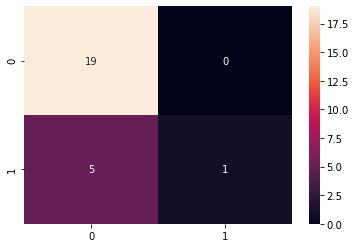

In [65]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))